In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    implementChannelWidthLimit,
    readHEPDataCsv,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
from Higgs import predictions as HP

pred = HP.Predictions()
H = pred.addParticle(HP.BsmParticle("H", "neutral", "even"))
A = pred.addParticle(HP.BsmParticle("A", "neutral", "odd"))


# CMS 13TeV LHC

## CMS `gg > H > tt` CP-even [1908.01115](https://arxiv.org/abs/1908.01115)
This is limit on the effective Htt coupling. We approximate the squared-coupling by the SM-normalized ttH cxn. Note that we do *not* implement the lower limit on the coupling that appears for larger widths.

In [3]:
@np.vectorize
def get_ggHtt_rate(mass, rw):
    H.setMass(mass)
    effC = HP.NeutralEffectiveCouplings()
    effC.tt = complex(1, 0)
    HP.effectiveCouplingInput(H, effC, reference='SMHiggs')
    tt_w = H.totalWidth()*H.br('tt')
    tt_br = tt_w/(mass*rw)
    return H.cxn('LHC13', 'ggH')*tt_br

In [4]:
df = pd.DataFrame(columns=["m", "normWidth", "obs", "exp"])
for fig, normWidth in [
    ("a", 5e-3),
    ("b", 1e-2),
    ("c", 2.5e-2),
    ("d", 5e-2),
    ("e", 10e-2),
    ("f", 25e-2),
]:
    dfs = readHEPDataCsv(
        "https://www.hepdata.net/download/table/ins1747886/Figure%205-{}/2/csv".format(
            fig
        )
    )
    dfs[0].columns = ["m", "obs"]
    assert np.allclose(dfs[0].m, dfs[1].iloc[:, 0])
    if fig == "f":
        dfs[0]["exp"] = dfs[2].iloc[:, 1]
    else:
        dfs[0]["exp"] = dfs[1].iloc[:, 1]
    dfs[0]["normWidth"] = normWidth
    df = pd.concat([df, dfs[0]], ignore_index=True)
df.drop(df[df.m % 25 != 0].index, inplace=True)

In [5]:
df.obs = [get_ggHtt_rate(e["m"], e["normWidth"])*e["obs"]**4 for _, e in df.iterrows()] # convert limits on coupling to limits on gg -> H -> tt rate
df.exp = [get_ggHtt_rate(e["m"], e["normWidth"])*e["exp"]**4 for _, e in df.iterrows()]

Looks good. Saving this to ggH_coup_LHC13_CMS_36.json


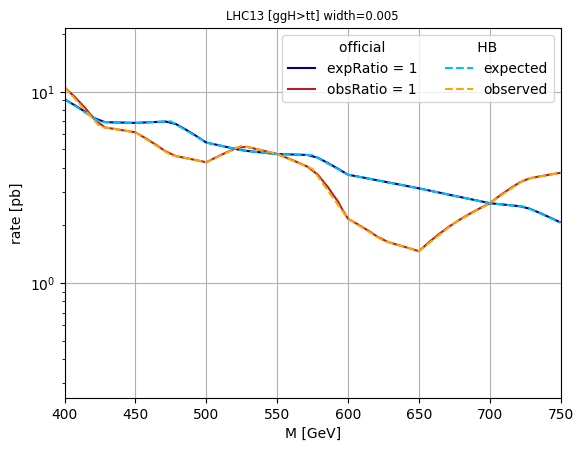

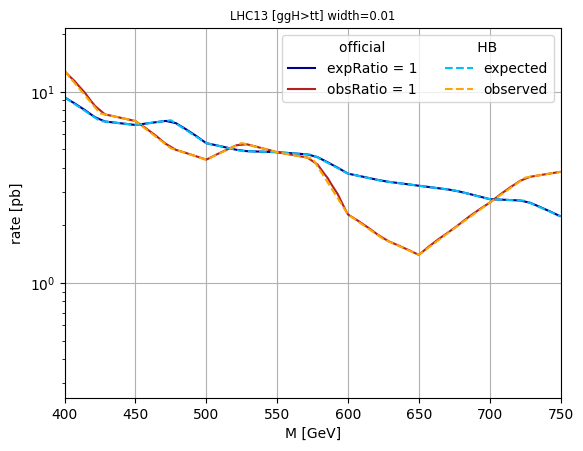

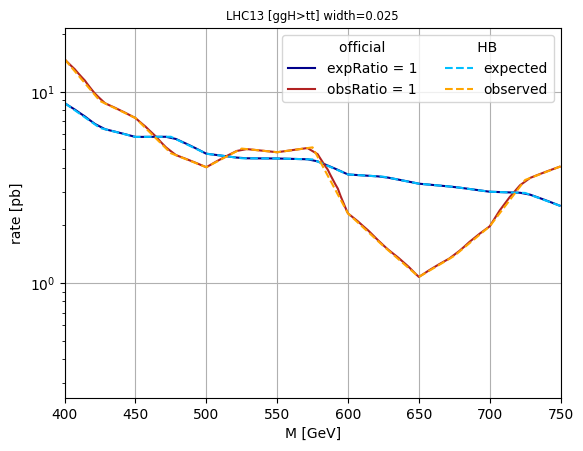

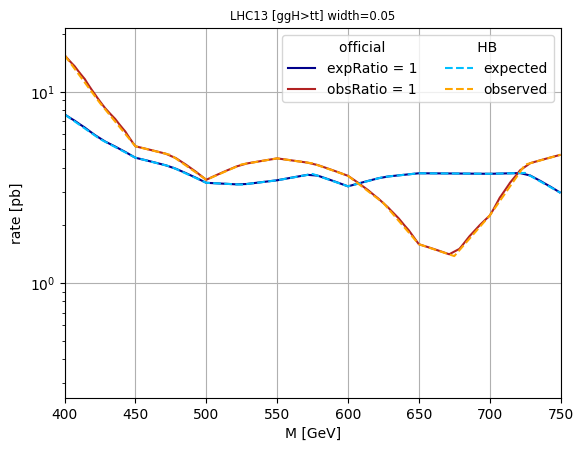

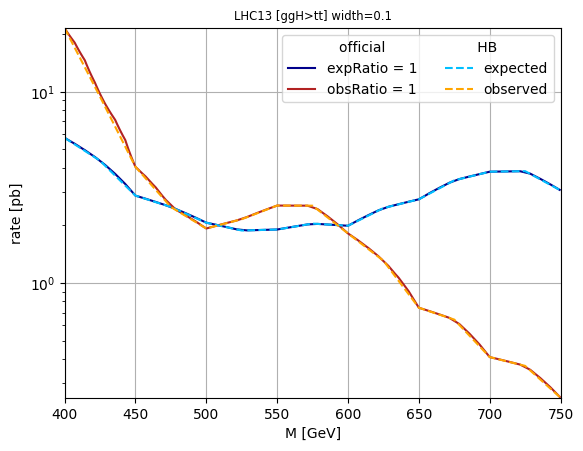

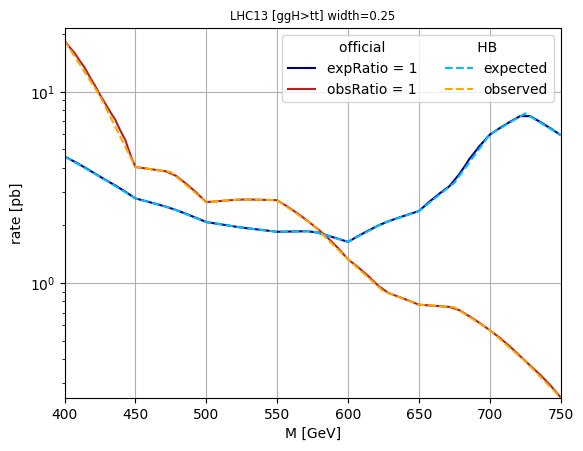

In [7]:
limitFile = implementChannelWidthLimit(
    "1908.01115",
    {"channels": [["ggH", "tt"]]},
    "https://doi.org/10.17182/hepdata.89937.v2",
    df,
    idSuffix=1,
    prefix="ggH_coup",
    # normalization={"reference": "SMHiggs", "process": "signal"},
    constraints=[{"CPValue": "even"}, {"topDominatedHgg": True}],
    massResolution={"absolute": 0, "relative": 0},  # turn off clustering
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim, cp="even")


## CMS `gg > H > tt` CP-odd [1908.01115](https://arxiv.org/abs/1908.01115)
This is limit on the effective Htt coupling. We approximate the squared-coupling by the SM-normalized ttH cxn. Note that we do *not* implement the lower limit on the coupling that appears for larger widths.

In [6]:
@np.vectorize
def get_ggAtt_rate(mass, rw):
    A.setMass(mass)
    effC = HP.NeutralEffectiveCouplings()
    effC.tt = complex(0, 1)
    HP.effectiveCouplingInput(A, effC, reference='SMHiggs')
    tt_w = A.totalWidth()*A.br('tt')
    tt_br = tt_w/(mass*rw)
    return A.cxn('LHC13', 'ggH')*tt_br

In [3]:
df = pd.DataFrame(columns=["m", "normWidth", "obs", "exp"])
for fig, normWidth in [
    ("a", 5e-3),
    ("b", 1e-2),
    ("c", 2.5e-2),
    ("d", 5e-2),
    ("e", 10e-2),
    ("f", 25e-2),
]:
    dfs = readHEPDataCsv(
        "https://www.hepdata.net/download/table/ins1747886/Figure%206-{}/2/csv".format(
            fig
        )
    )
    dfs[0].columns = ["m", "obs"]
    assert np.allclose(dfs[0].m, dfs[1].iloc[:, 0])
    if fig == "e" or fig == "f":
        dfs[0]["exp"] = dfs[3].iloc[:, 1]
    else:
        dfs[0]["exp"] = dfs[1].iloc[:, 1]
    dfs[0]["normWidth"] = normWidth
    df = pd.concat([df, dfs[0]], ignore_index=True)
df.drop(df[df.m % 25 != 0].index, inplace=True)

In [ ]:
df.obs = [get_ggAtt_rate(e["m"], e["normWidth"])*e["obs"]**4 for _, e in df.iterrows()] # convert limits on coupling to limits on gg -> A -> tt rate
df.exp = [get_ggAtt_rate(e["m"], e["normWidth"])*e["exp"]**4 for _, e in df.iterrows()]

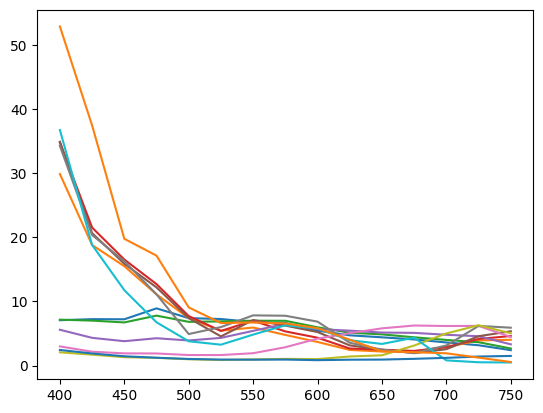

Looks good. Saving this to ggA_coup_LHC13_CMS_36.json


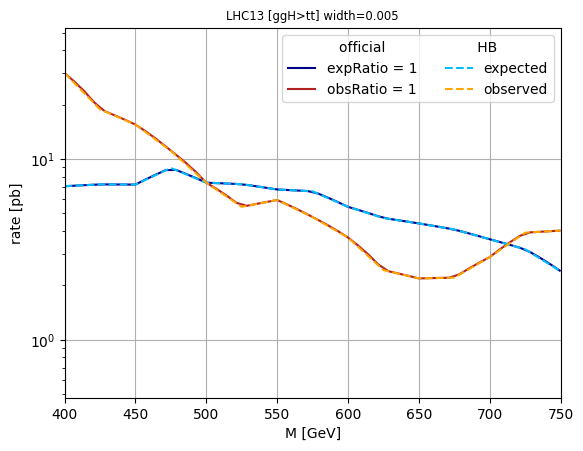

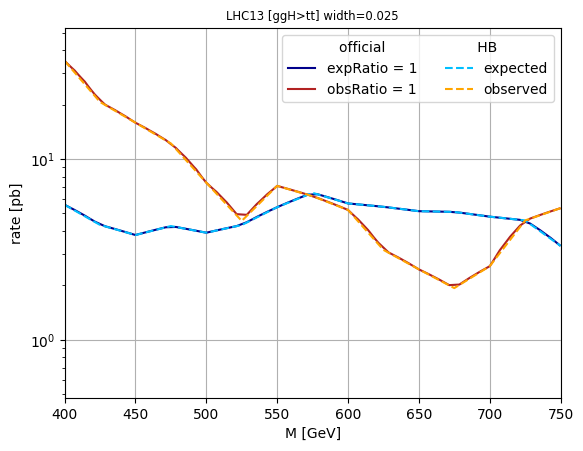

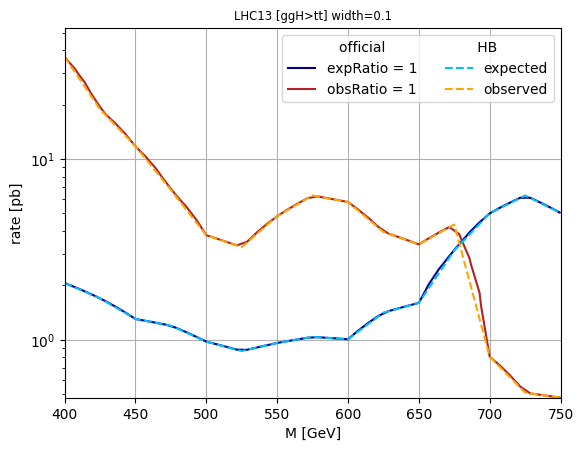

In [8]:
limitFile = implementChannelWidthLimit(
    "1908.01115",
    {"channels": [["ggH", "tt"]]},
    "https://doi.org/10.17182/hepdata.89937.v2",
    df,
    idSuffix=2,
    prefix="ggA_coup",
    # normalization={"reference": "SMHiggs", "process": "signal"},
    constraints=[{"CPValue": "odd"}, {"topDominatedHgg": True}],
    massResolution={"absolute": 0, "relative": 0},  # turn off clustering
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim, cp="odd")
